# 介紹
本專案撈取氣象屬之紫外線公開資料，紫外線指數達標時，於設定時間推播訊息提醒地區民眾防曬

In [ ]:
!pip install schedule
import schedule
import requests
import pandas as pd
from datetime import datetime
from IPython.display import display
import time

取得紫外線資料

In [ ]:
url = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/O-A0005-001?Authorization=CWA-1AA20C91-AEAB-4621-9CCC-CBD3C1132B3D'
jdata = requests.get(url).json()

# 建立空的 DataFrame
df = pd.DataFrame(columns=["location", "uvindex", "date"])
# 將紫外線資料填入 DataFrame
for loc in jdata["records"]["weatherElement"]["location"]:
    location = loc["StationID"]
    uvindex = loc['UVIndex']
    date = jdata["records"]["weatherElement"]["Date"]
    # date_obj = datetime.strptime(date, "%Y-%m-%d").replace(hour=0, minute=0, second=1)
    df.loc[len(df.index)] = [location, uvindex, date]

撰寫函式及設定排呈

In [ ]:
def job():
    # 條件設定在資料時間與實際時間同一天
    datetimenow = datetime.now().date()
    dt1 = datetimenow
    dt2 = datetime.strptime(df.iloc[2]['date'], "%Y-%m-%d").date()
    if dt1 == dt2 and\
      not df[df["location"] == "467490"].empty\  # 467490為台中地區
      and df[df["location"] == "467490"]["uvindex"].iloc[0] > 3:  # 當紫外線指數大於3時，提醒民眾注意防曬
        # 如果在同天且則早上七點進行推播通知
        notify_url = 'https://notify-api.line.me/api/notify'
        token = 'RIDNYav7Tr4aRaALwt244MiXg01tEJVALqrdU0w3ZKh'
        row = df[df["location"] == "467490"]
        headers = {
            "Authorization": "Bearer " + token
        }
        data = {
            "message": "\n地區: 台中\n紫外線指數: {}\n請記得要準備防曬喔".format(row['uvindex'].iloc[0])
        }
        response = requests.post(notify_url, headers=headers, data=data)
        print("Notification sent successfully.")

# 設定每日執行時間
schedule.every().day.at("07:00").do(job)

# 進入主迴圈
while True:
    print("checking")
    # 執行尚未執行的任務
    schedule.run_pending()
    # 每隔60秒檢查一次是否有任務需要執行
    time.sleep(1)

# 成果展示
* 由於colab執行排成功能會受限，故在python上實現並截圖展示  
* 時間設定以撰寫專案當下時刻，以利結果呈現

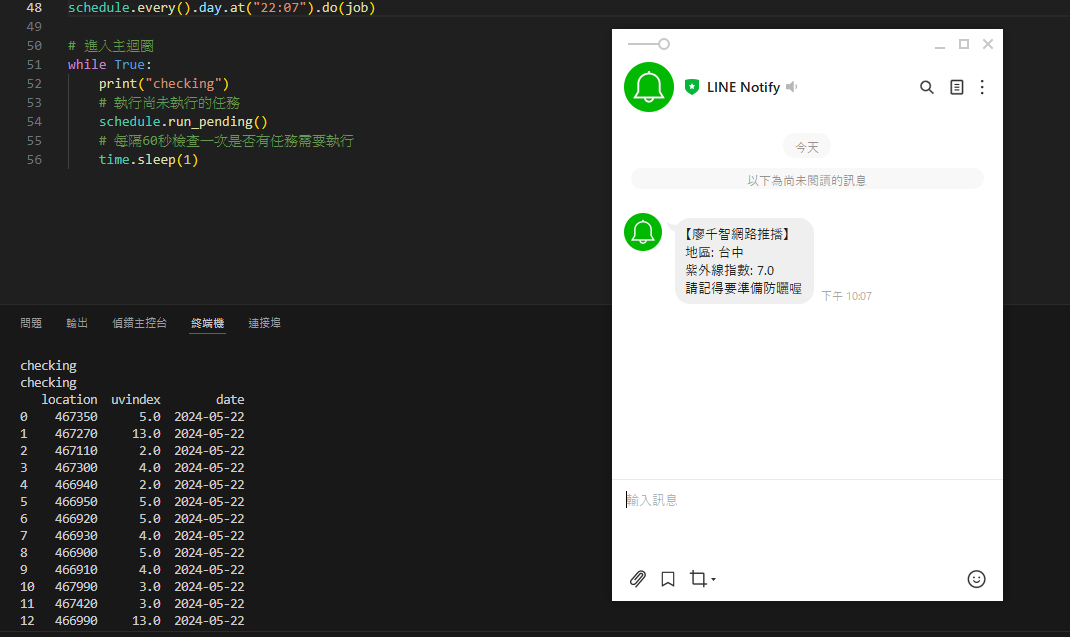